<a href="https://colab.research.google.com/github/pettyway/iesi/blob/main/insyaallah_bener.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd #library di phyton yang menyediakan struktur data dan analisis data -> tabel,dimensi
import numpy as np #librray untuk melakukan operasi komputasi data bertipe numerik
import string #mengubah tipe data berupa objek menjadi bentuk string
import re #reguler expresion, memungkinkan melakukan pencarian, manipulasi teks berdasarkan pola
import nltk #library pemrosesan bahasa alami ->  klasifikasi, tokenization, stemming,

In [ ]:
#upload file ulasan
from google.colab import  files
uploades = files.upload()

Saving Ulasan_Label_Aspek_penyamaan.csv to Ulasan_Label_Aspek_penyamaan (1).csv


In [2]:
#menampilkan data yang telah diinput
df_show = pd.read_csv('Ulasan_Label_Aspek.csv',sep=";", encoding='cp1252')  #menampilkan data yang telah ditambahkan
df_show.head(1000) #menampilkan sebanyak data teratas

,Nama Pengunjung,Ulasan,Label,Aspek RCA (Fishbone Diagram)
0,Petty Parker,Tempatnya nyaman parkirnya luas tapi kadang ka...,Negatif,kebersihan (cleanliness)
1,Vevy Riany,"Tempat bagus bersih, namun kamar mandi sering ...",Negatif,pelayanan (manpower)
2,Dzunnurain AndRa,"Sekarang kolam anak panas GK kayak dulu,di kas...",Negatif,lingkungan (environment)
3,Harifin Vicko,kamar mandi kurang bersih,Negatif,kebersihan (cleanliness)
4,suwa,Aku suka banget renang di sana aku juga hari s...,Positif,lingkungan (environment)
...,...,...,...,...
622,Cak Mul,Kolam renang tidak buruk,Positif,fasilitas (facility)
623,syendy prayogo,Kolam renang favorit. .. keluarga dan bersih,Positif,kebersihan (cleanliness)
624,elok dyah,Kolam renang yang bagus. . . Sangat direkomend...,Positif,fasilitas (facility)
625,Ainun Fajar,"Kolam renangnya bagus, harganya juga bagus. . .",Positif,harga (price)


In [3]:
#merubah bentuk data frame pada kolom ulasan menjadi bentuk list
Ulasan = list(df_show['Ulasan'].values)

# **PREPROCESSING**

**CASE FOLDING**

In [4]:
#CASE FOLDING STEP
def casefolding(data):
  return data.lower() #fungsi lower untuk mengubah seluruh huruf menjadi huruf keci;
Ulasan_low= list(map(casefolding, Ulasan))

In [ ]:
print ('HASIL CASE FOLDING')
print (Ulasan_low)

HASIL CASE FOLDING
['tempatnya nyaman parkirnya luas tapi kadang kamar mandinya agak kotor', 'tempat bagus bersih, namun kamar mandi sering nya kotor, mungkin bisa petugas nya mengecek setengah jam sekali/ sejam sekali utk tetap terjaga kebersihannya, air …', 'sekarang kolam anak panas gk kayak dulu,di kasih hiasan jd adem terlindung dr panas bwt anak2', 'kamar mandi kurang bersih', 'aku suka banget renang di sana aku juga hari sabtu mau ke sana nech doa ini aja enggak hujan ya gasy …', 'baru pertama kesini, nyesel masuk..kebanyakan aturan, sy yg ngantar aja pakai sepatu ga boleh, istri dampingi anak renang ga boleh pakai kaos kaki.. …', 'ak ada sarana fitnes', 'banyak peraturan', 'renang disini lokernya harus pake kartu pelajar, jadi gabisa make loger padahal adekku masih belom dapet. ga dapet loker akhirnya uang adekku hilang aduh kzl bgt', 'jangan datang di hari minggu, ruaamee boss,,', 'mahal', 'please pak,senin buka seperti jam lain saya kerja libur cuma hari senin,saya pengen lam

**TOKENIZING**

In [5]:
#TOKENIZING STEP

from nltk.tokenize import word_tokenize #library nltk untuk proses tokenizing
from nltk.probability import FreqDist #untuk merekam frekuensi setiap kata
nltk.download('punkt') #nltk library tool untuk tokenizing dokumen

#menghapus karakter spesial
def hapus_karakter_spesial(data):
  #mengganti sebuah substring tab, enter dengan substring spasi
  data = data.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\'," ")
  #menghapus emoticon
  data= data.encode('ascii', 'replace').decode('ascii')
  #fungsi sub untuk menggantikan string || fungsi split untuk mengembalikan string yang telah dipisah
  data= ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", data).split())
  return data
Ulasan_low = list(map(hapus_karakter_spesial, Ulasan_low))

#menghapus angka
def hapus_angka(data):
  return re.sub(r"\d+", " ", data)
Ulasan_low = list(map(hapus_angka, Ulasan_low))

#menghilangkan tanda baca
def punctuation(data):
  remove = string.punctuation
  translator= str.maketrans(remove, ' '*len(remove))
  data = data.translate(translator)
  return data
Ulasan_low = list(map(punctuation, Ulasan_low))

#proses tokenizing dengan punkt natural language toolkit
def tokenizing(data):
  return word_tokenize(data)
Ulasan_token = list(map(tokenizing, Ulasan_low))


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
print ('HASIL TOKENIZING')
print (Ulasan_token)

HASIL TOKENIZING
[['tempatnya', 'nyaman', 'parkirnya', 'luas', 'tapi', 'kadang', 'kamar', 'mandinya', 'agak', 'kotor'], ['tempat', 'bagus', 'bersih', 'namun', 'kamar', 'mandi', 'sering', 'nya', 'kotor', 'mungkin', 'bisa', 'petugas', 'nya', 'mengecek', 'setengah', 'jam', 'sekali', 'sejam', 'sekali', 'utk', 'tetap', 'terjaga', 'kebersihannya', 'air'], ['sekarang', 'kolam', 'anak', 'panas', 'gk', 'kayak', 'dulu', 'di', 'kasih', 'hiasan', 'jd', 'adem', 'terlindung', 'dr', 'panas', 'bwt', 'anak'], ['kamar', 'mandi', 'kurang', 'bersih'], ['aku', 'suka', 'banget', 'renang', 'di', 'sana', 'aku', 'juga', 'hari', 'sabtu', 'mau', 'ke', 'sana', 'nech', 'doa', 'ini', 'aja', 'enggak', 'hujan', 'ya', 'gasy'], ['baru', 'pertama', 'kesini', 'nyesel', 'masuk', 'kebanyakan', 'aturan', 'sy', 'yg', 'ngantar', 'aja', 'pakai', 'sepatu', 'ga', 'boleh', 'istri', 'dampingi', 'anak', 'renang', 'ga', 'boleh', 'pakai', 'kaos', 'kaki'], ['ak', 'ada', 'sarana', 'fitnes'], ['banyak', 'peraturan'], ['renang', 'disini'

**STOPWORD REMOVAL**

In [ ]:
#upload kamus stopwrod
from google.colab import  files
uploades = files.upload()

In [6]:
#STOPWORD STEP

nltk.download('stopwords')
from nltk.corpus import stopwords #library nltk untuk proses stopword

stopwords= stopwords.words('indonesian')#mendefinisikan bahasa yang dibunakan
#menambah kata yang dibutuhkan untuk stopword
stopwords.extend(["yg", "dg", "rt", "dgn", "ny", 'klo', 'gk', 'ak', 'aku', 'saya', 'kamu',
                  'kalo', 'amp', 'biar', 'bikin', 'bilang', "please", "meriah", 'iya',
                  'gak', 'ga', 'krn', 'nya', 'nih', 'sih', "to", "rbu", "tapi",
                  'si', 'tau', 'tdk', 'tuh', 'utk', 'ya', 'syg', 'sekali', "tpi",
                  'jd', 'jgn', 'sdh', 'aja', 'sy','nyg', 'hehe',"tp",'bos', 'sm',
                  'pen', 'nan', 'loh', 'rt','yah', 'dr', "lah", "sih","lho", 'sya',
                  "sgt", "bgt", "tau", "di", "nya", "ny", "a", "b", "k", "rb","bos",
                  "rp", "k", "n", "bro", "guys", "aja", "banget", "bgt", "dong", "kok"])
#membaca inputan kamus stopword yang telah di buat
stop = pd.read_csv("stopwords.txt", names= ["stopwords"], header = None)
#menambahkan kata untuk dimasukkan dalam kamus stopword
stopwords.extend(stop["stopwords"][0].split(' '))
stopwords = set(stopwords)

#stopword dengan natural language toolkit
def stopword_removal(data):
    return [token for token in data if token not in stopwords]
Ulasan_stop= list(map(stopword_removal, Ulasan_token))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
print ('HASIL STOPWORD REMOVAL')
print (Ulasan_stop)

HASIL STOPWORD REMOVAL
[['tempatnya', 'nyaman', 'parkirnya', 'luas', 'kadang', 'kamar', 'mandinya', 'kotor'], ['bagus', 'bersih', 'kamar', 'mandi', 'kotor', 'petugas', 'mengecek', 'jam', 'sejam', 'terjaga', 'kebersihannya', 'air'], ['kolam', 'anak', 'panas', 'kayak', 'kasih', 'hiasan', 'adem', 'terlindung', 'panas', 'bwt', 'anak'], ['kamar', 'mandi', 'bersih'], ['suka', 'renang', 'sabtu', 'nech', 'doa', 'hujan', 'gasy'], ['kesini', 'nyesel', 'masuk', 'kebanyakan', 'aturan', 'ngantar', 'pakai', 'sepatu', 'istri', 'dampingi', 'anak', 'renang', 'pakai', 'kaos', 'kaki'], ['sarana', 'fitnes'], ['peraturan'], ['renang', 'lokernya', 'pake', 'kartu', 'pelajar', 'gabisa', 'make', 'loger', 'adekku', 'belom', 'dapet', 'dapet', 'loker', 'uang', 'adekku', 'hilang', 'aduh', 'kzl'], ['minggu', 'ruaamee', 'boss'], ['mahal'], ['senin', 'buka', 'jam', 'kerja', 'libur', 'senin', 'pengen', 'renangnya', 'pengen', 'kejar', 'kartika', 'eka', 'paksi'], ['harga'], ['tempatnya', 'nyaman', 'bersih', 'pegawai', '

# **STEMMING**

**NORMALISASI**

In [ ]:
#sebelum melakukan stemming akan dilakukan normalisasi bahasa baku sesuai KBBI
#menginput kamus normalisasi yang telah di buat
normalized= pd.read_excel("kamus_bahasa.xlsx")
normalized_ulasan = {}

#looping untuk mengecek setiap kata dalam ulasan apakah ada yang sama dengan kamus
for index, row in normalized.iterrows():
    if row[0] not in normalized_ulasan:
        normalized_ulasan[row[0]] = row[1]

#data yang sama dengan kamus normalisasi maka akan dilakukan proses normalisasi
def normalized_term(data):
    return [normalized_ulasan[data] if data in normalized_ulasan else data for data in data]
Ulasan_norm= list(map(normalized_term, Ulasan_stop))

In [ ]:
print ('HASIL NORMALISASI')
print (Ulasan_norm)

HASIL NORMALISASI
[['tempatnya', 'nyaman', 'parkirnya', 'luas', 'kadang', 'kamar', 'mandinya', 'kotor'], ['bagus', 'bersih', 'kamar', 'mandi', 'kotor', 'petugas', 'memeriksa', 'jam', 'sejam', 'terjaga', 'kebersihannya', 'air'], ['kolam', 'anak', 'panas', 'kayak', 'beri', 'hiasan', 'dingin', 'terlindung', 'panas', 'untuk', 'anak'], ['kamar', 'mandi', 'bersih'], ['suka', 'renang', 'sabtu', 'ini', 'doa', 'hujan', 'tidak'], ['kesini', 'menyesal', 'masuk', 'kebanyakan', 'aturan', 'antar', 'pakai', 'sepatu', 'istri', 'dampingi', 'anak', 'renang', 'pakai', 'kaos', 'kaki'], ['rekomendasi', 'fitnes'], ['peraturan'], ['renang', 'lokernya', 'pakai', 'kartu', 'pelajar', 'tidak bisa', 'memakai', 'loger', 'adik saya', 'belom', 'dapat', 'dapat', 'loker', 'uang', 'adik saya', 'hilang', 'aduh', 'kecewa'], ['minggu', 'ramai', 'bos'], ['mahal'], ['senin', 'buka', 'jam', 'kerja', 'libur', 'senin', 'ingin', 'renangnya', 'ingin', 'kejar', 'kartika', 'eka', 'paksi'], ['harga'], ['tempatnya', 'nyaman', 'bersi

**STEMMING**

In [7]:
#library untuk melakukan pencarian kata dasar untuk bahasa indonesia
!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.4 MB/s eta 0:00:00


In [8]:
#sebelum melakukan stemming akan dilakukan normalisasi bahasa baku sesuai KBBI
#menginput kamus normalisasi yang telah di buat
normalized= pd.read_excel("kamus_bahasa.xlsx")
normalized_ulasan = {}

#looping untuk mengecek setiap kata dalam ulasan apakah ada yang sama dengan kamus
for index, row in normalized.iterrows():
    if row[0] not in normalized_ulasan:
        normalized_ulasan[row[0]] = row[1]

#data yang sama dengan kamus normalisasi maka akan dilakukan proses normalisasi
def normalized_term(data):
    return [normalized_ulasan[data] if data in normalized_ulasan else data for data in data]
Ulasan_norm= list(map(normalized_term, Ulasan_stop))

#menginpor ibrary untuk mencari kata dasar bahasa indonesia
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

#fungsi untuk melakukan pengecekan pada setiap kata apakah perlu untuk dicari kata dasar atau tidak
def stemming(data):
  stemming_result = []
  for word in data:
    stemming_result.append(stemmer.stem(word))
  return stemming_result
Ulasan_stem= list(map(stemming, Ulasan_norm))

In [ ]:
print ('HASIL STEMMING')
print (Ulasan_stem)

HASIL STEMMING
[['tempat', 'nyaman', 'parkir', 'luas', 'kadang', 'kamar', 'mandi', 'kotor'], ['bagus', 'bersih', 'kamar', 'mandi', 'kotor', 'tugas', 'periksa', 'jam', 'jam', 'jaga', 'bersih', 'air'], ['kolam', 'anak', 'panas', 'kayak', 'beri', 'hias', 'dingin', 'lindung', 'panas', 'untuk', 'anak'], ['kamar', 'mandi', 'bersih'], ['suka', 'renang', 'sabtu', 'ini', 'doa', 'hujan', 'tidak'], ['kesini', 'sesal', 'masuk', 'banyak', 'atur', 'antar', 'pakai', 'sepatu', 'istri', 'damping', 'anak', 'renang', 'pakai', 'kaos', 'kaki'], ['rekomendasi', 'fitnes'], ['atur'], ['renang', 'lokernya', 'pakai', 'kartu', 'ajar', 'tidak bisa', 'pakai', 'loger', 'adik saya', 'bom', 'dapat', 'dapat', 'loker', 'uang', 'adik saya', 'hilang', 'aduh', 'kecewa'], ['minggu', 'ramai', 'bos'], ['mahal'], ['senin', 'buka', 'jam', 'kerja', 'libur', 'senin', 'ingin', 'renang', 'ingin', 'kejar', 'kartika', 'eka', 'paksi'], ['harga'], ['tempat', 'nyaman', 'bersih', 'pegawai', 'ramah', 'air', 'kamar', 'ganti', 'bersih', 'r

# **DOWNLOAD DATA UNTUK TF-IDF DAN WORD CLOUD**

In [ ]:
df= pd.DataFrame(data_final)
print (df)

                                                     0
0    tempat nyaman parkir luas kadang kamar mandi k...
1    bagus bersih kamar mandi kotor tugas periksa j...
2    kolam anak panas kayak beri hias dingin lindun...
3                                   kamar mandi bersih
4                suka renang sabtu ini doa hujan tidak
..                                                 ...
622                                 kolam renang buruk
623               kolam renang favorit keluarga bersih
624                     kolam renang bagus rekomendasi
625                     kolam renang bagus harga bagus
626                                 keren bagus renang

[627 rows x 1 columns]


In [ ]:
df.to_excel("preprop.xlsx")

# **READ DATA YANG TELAH DI DOWNLOAD**

In [9]:
df= pd.read_excel('preprop.xlsx')  #menampilkan data yang telah ditambahkan
df.head(1000) #menampilkan sebanyak data teratas

,Ulasan,Label,Aspek RCA (Fishbone Diagram)
0,tempat nyaman parkir luas kadang kamar mandi k...,Negatif,kebersihan (cleanliness)
1,bagus bersih kamar mandi kotor tugas periksa j...,Negatif,pelayanan (manpower)
2,kolam anak panas kayak beri hias dingin lindun...,Negatif,lingkungan (environment)
3,kamar mandi bersih,Negatif,kebersihan (cleanliness)
4,suka renang sabtu ini doa hujan tidak,Positif,lingkungan (environment)
...,...,...,...
622,kolam renang buruk,Positif,fasilitas (facility)
623,kolam renang favorit keluarga bersih,Positif,kebersihan (cleanliness)
624,kolam renang bagus rekomendasi,Positif,fasilitas (facility)
625,kolam renang bagus harga bagus,Positif,harga (price)


# **PENGUJIAN KNN SELURUH DATA**

TF-IDF DATA PREPROCESSING

In [10]:
#menghitung TF-IDF dari corpus sklearn dengan modul TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(smooth_idf=False, norm=None)
#X=vectorizer.fit_transform(df_show_aspek_clean.drop(["Label"], axis=1))
#Y= df_show_aspek_clean["Label"]
X = vectorizer.fit_transform(df['Ulasan'].values.astype('U')).toarray() #mendefinisikan X adalah data final
Y = df['Label'].values #mendefinisikan Y adalah label dokumen "positif" atau "negatif"

In [11]:
#melakukan pemisahan antara pembagian testing dan training untuk validasi hasil

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size= 0.20, stratify= Y, random_state=42)

scaler = StandardScaler(with_mean=False)
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.fit_transform(X_test)


In [12]:
#mencoba mencari akurasi terbaik
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

accuracies= []
precision = []
recalls=[]
kfold= StratifiedKFold(n_splits=5, shuffle=True, random_state= 42)

for k in range (1,26):
  knn = KNeighborsClassifier(n_neighbors = k)
  knn.fit(scaled_X_train, y_train)
  accuracy=(cross_val_score(knn, X, Y, cv=kfold, scoring='accuracy'))
  accuracyy= accuracy.mean()
  presisi= (cross_val_score(knn, X, Y, cv=kfold, scoring='precision_macro'))
  presisii=presisi.mean()
  recall = (cross_val_score(knn, X, Y, cv=kfold, scoring='recall_macro'))
  recalll= recall.mean()
  accuracies.append(accuracyy)
  precision.append(presisii)
  recalls.append(recalll)
  print("Nilai Accuracy")
  print("k=" , k, accuracy, np.round(accuracies[k-1], 2))
  print("\nNilai Precision")
  print("k=" , k, presisi, np.round(precision[k-1], 2))
  print("\nNilai Recall")
  print("k=" , k, recall, np.round(recalls[k-1], 2))
  print()

Nilai Accuracy
k= 1 [0.76984127 0.66666667 0.752      0.736      0.728     ] 0.73

Nilai Precision
k= 1 [0.76984127 0.67544346 0.75980129 0.7384696  0.7275641 ] 0.73

Nilai Recall
k= 1 [0.77045455 0.65984848 0.74807692 0.73333333 0.7275641 ] 0.73

Nilai Accuracy
k= 2 [0.77777778 0.65079365 0.72       0.728      0.72      ] 0.72

Nilai Precision
k= 2 [0.79526316 0.65740741 0.72984721 0.73155315 0.72450828] 0.73

Nilai Recall
k= 2 [0.78333333 0.65454545 0.72371795 0.73012821 0.7224359 ] 0.72

Nilai Accuracy
k= 3 [0.8015873  0.76190476 0.744      0.712      0.776     ] 0.76

Nilai Precision
k= 3 [0.80345711 0.79215116 0.74582681 0.72586981 0.77691511] 0.77

Nilai Recall
k= 3 [0.79924242 0.75378788 0.74166667 0.70641026 0.77435897] 0.76

Nilai Accuracy
k= 4 [0.8015873  0.76190476 0.752      0.72       0.752     ] 0.76

Nilai Precision
k= 4 [0.80129016 0.76842105 0.75217614 0.72913257 0.75320513] 0.76

Nilai Recall
k= 4 [0.80075758 0.75757576 0.7525641  0.71538462 0.75320513] 0.76

Nilai Ac

# **PENGELOMPOKAN BERDASARKAN ASPEK**

In [13]:
df_show_aspek_clean = df.groupby("Aspek RCA (Fishbone Diagram)").get_group("kebersihan (cleanliness)")
#df_show_aspek_clean .head(1000)

In [14]:
df_show_aspek_manpower = df.groupby("Aspek RCA (Fishbone Diagram)").get_group("pelayanan (manpower)")
#df_show_aspek_manpower .head(1000)

In [15]:
df_show_aspek_envi = df.groupby("Aspek RCA (Fishbone Diagram)").get_group("lingkungan (environment)")
#df_show_aspek_envi .head(1000)

In [16]:
df_show_aspek_fasi = df.groupby("Aspek RCA (Fishbone Diagram)").get_group("fasilitas (facility)")
#df_show_aspek_fasi .head(1000)

In [17]:
df_show_aspek_harga = df.groupby("Aspek RCA (Fishbone Diagram)").get_group("harga (price)")
#df_show_aspek_harga .head(1000)

In [18]:
df_show_aspek_methods = df.groupby("Aspek RCA (Fishbone Diagram)").get_group("metode (methods)")
#df_show_aspek_methods .head(1000)

In [51]:
df_show_aspek_pengukuran = df.groupby("Aspek RCA (Fishbone Diagram)").get_group("pengukuran (measurement)")
#df_show_aspek_pengukuran.head(1000)

# **PENGUJIAN KNN SETIAP ASPEK**

TF-IDF DATA PREPROCESSING

In [35]:
#menghitung TF-IDF dari corpus sklearn dengan modul TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(smooth_idf=False, norm=None)
X=vectorizer.fit_transform(df_show_aspek_pengukuran["Ulasan"])
Y= df_show_aspek_pengukuran["Label"]

In [36]:
#melakukan pemisahan antara pembagian testing dan training untuk validasi hasil

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size= 0.20, stratify= Y, random_state=42)

scaler = StandardScaler(with_mean=False)
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.fit_transform(X_test)


In [49]:
import warnings
from sklearn.exceptions import UndefinedMetricWarning
warnings.filterwarnings('ignore', category=UndefinedMetricWarning, module='sklearn.metrics._classification',
                        message="Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.")


warnings.filterwarnings('ignore', category=UndefinedMetricWarning)

In [50]:
#mencoba mencari akurasi terbaik
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

accuracies= []
precision = []
recalls=[]
kfold= StratifiedKFold(n_splits=5, shuffle=True, random_state= 42)

for k in range (1,26):
  knn = KNeighborsClassifier(n_neighbors = k)
  knn.fit(scaled_X_train, y_train)
  accuracy=(cross_val_score(knn, X, Y, cv=kfold, scoring='accuracy'))
  accuracyy= accuracy.mean()
  presisi= (cross_val_score(knn, X, Y, cv=kfold, scoring='precision_macro'))
  presisii=presisi.mean()
  recall = (cross_val_score(knn, X, Y, cv=kfold, scoring='recall_macro'))
  recalll= recall.mean()
  accuracies.append(accuracyy)
  precision.append(presisii)
  recalls.append(recalll)

for k in range (1,26):
    print ("k = ", k, " => akurasi = ", np.round(accuracies[k-1], 2), " => precision = ", np.round(precision[k-1], 2), " => recall = ", np.round(recalls[k-1], 2))

k =  1  => akurasi =  0.8  => precision =  0.75  => recall =  0.68
k =  2  => akurasi =  0.78  => precision =  0.49  => recall =  0.53
k =  3  => akurasi =  0.77  => precision =  0.55  => recall =  0.58
k =  4  => akurasi =  0.78  => precision =  0.49  => recall =  0.53
k =  5  => akurasi =  0.82  => precision =  0.7  => recall =  0.6
k =  6  => akurasi =  0.77  => precision =  0.38  => recall =  0.5
k =  7  => akurasi =  0.78  => precision =  0.49  => recall =  0.53
k =  8  => akurasi =  0.77  => precision =  0.38  => recall =  0.5
k =  9  => akurasi =  0.77  => precision =  0.38  => recall =  0.5
k =  10  => akurasi =  0.77  => precision =  0.38  => recall =  0.5
k =  11  => akurasi =  0.77  => precision =  0.38  => recall =  0.5
k =  12  => akurasi =  0.77  => precision =  0.38  => recall =  0.5
k =  13  => akurasi =  0.77  => precision =  0.38  => recall =  0.5
k =  14  => akurasi =  0.77  => precision =  0.38  => recall =  0.5
k =  15  => akurasi =  0.77  => precision =  0.38  => 

# **WORD CLOUD**

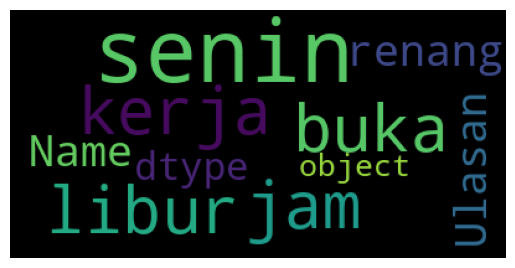

In [ ]:
import matplotlib.pyplot as plt

#from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

#stopwords = set(STOPWORDS)
data = df_show_aspek_harga.groupby("Label").get_group("Negatif")
wordcloud = WordCloud(background_color='black',
                      stopwords=stopwords,
                      max_font_size=70,
                      random_state=42
                      ).generate(str(data['Ulasan']))
print(wordcloud)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


# **REPORT & MATRIX**

**Melihat classification report k-fold**

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


kfold= StratifiedKFold(n_splits=5, shuffle=True, random_state= 42)

knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(scaled_X_train, y_train)
prediction = cross_val_predict(knn, X, Y, cv=kfold)
reporrt = classification_report(Y,prediction)
print('\n Accuracy: ', accuracy_score(Y, prediction), )
print(reporrt)


 Accuracy:  0.7575757575757576
              precision    recall  f1-score   support

     Negatif       0.76      0.72      0.74       300
     Positif       0.76      0.79      0.77       327

    accuracy                           0.76       627
   macro avg       0.76      0.76      0.76       627
weighted avg       0.76      0.76      0.76       627



**Confusion matrix**

Text(50.722222222222214, 0.5, 'Actual Classes')

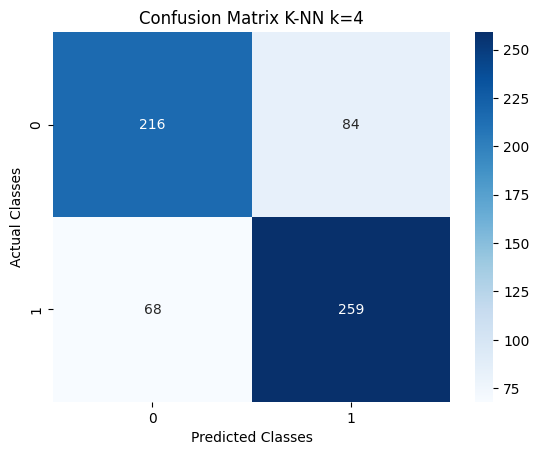

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix #library untuk menampilkan confussion matrix
import seaborn as sns #visualisasi matrix
kfold= StratifiedKFold(n_splits=5, shuffle=True, random_state= 42)

knn = KNeighborsClassifier(n_neighbors = 4)
prediction = cross_val_predict(knn, X, Y, cv=kfold)
conf_matrix= confusion_matrix(Y, prediction)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix K-NN k=4')
plt.xlabel('Predicted Classes')
plt.ylabel('Actual Classes')

**Melihat pembagian k-fold**

In [ ]:
from sklearn.model_selection import KFold

k = 5
kf= KFold(n_splits = k)
for train_index, test_index in kf.split(X):
  X_train, X_test = train_index, test_index
  print("Ini X" , "Train:", X_train, "\nini X" , "Test:", X_test)
  print()
for train_index, test_index in kf.split(Y):
  Y_train, Y_test = train_index, test_index
  print("ini Y" , "Train:", Y_train, "\nini Y" , "Test:", Y_test)
  print()

Ini X Train: [126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 332 333 334 335 336 337 338 339 340 341
 342 343 344 345 346 347 348 349 350 351 352 353 354 355 356 357 358 359
 360 361 362 363 364 365 366 367 368 3

# **TF-IDF LIBRARY SKLEARN**

In [ ]:
#library yang dapat membantu untuk melakukan pembelajaran mesin -> k-means, Tf-IDF
!pip install scikit-learn

In [ ]:
#hasil data akan dilakukan perubahan bentuk list untuk melakukan tf-idf agar dapat menghitung frekuensi kata pada satu dokumen
data_final = []
for sublist in Ulasan_stem:
  data_final.append(" ".join(sublist))
print(data_final)

['tempat nyaman parkir luas kadang kamar mandi kotor', 'bagus bersih kamar mandi kotor tugas periksa jam jam jaga bersih air', 'kolam anak panas kayak beri hias dingin lindung panas untuk anak', 'kamar mandi bersih', 'suka renang sabtu ini doa hujan tidak', 'kesini sesal masuk banyak atur antar pakai sepatu istri damping anak renang pakai kaos kaki', 'rekomendasi fitnes', 'atur', 'renang lokernya pakai kartu ajar tidak bisa pakai loger adik saya bom dapat dapat loker uang adik saya hilang aduh kecewa', 'minggu ramai bos', 'mahal', 'senin buka jam kerja libur senin ingin renang ingin kejar kartika eka paksi', 'harga', 'tempat nyaman bersih pegawai ramah air kamar ganti bersih rapi parkir luas nyaman', 'kolam renang bagus hari kolam hijau kolam anak dewasa kamar mandi bersih minggu harga tiket', 'lumayan perhati fasilitas mandi pria engsel pintu ganjal pintu rusak', 'tempat luas tiket libur', 'kolam renang bagus bersih pakai bebas pakai pakai renang kolam anak dewasa kamar mandi bersih m

In [ ]:
#menghitung TF-IDF dari corpus sklearn dengan modul TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(smooth_idf=False, norm=None)

X = vectorizer.fit_transform(data_final).toarray() #mendefinisikan X adalah data final
Y = df_show['Label'].values #mendefinisikan Y adalah label dokumen "positif" atau "negatif"

# **KNN**

KNN menggunakan k fold cross validation

In [ ]:
#melakukan pemisahan antara pembagian testing dan training untuk validasi hasil

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size= 0.20, stratify= Y, random_state=42)

scaler = StandardScaler(with_mean=False)
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.fit_transform(X_test)


In [ ]:
#mencoba mencari akurasi terbaik
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

accuracies= []
precision = []
recalls=[]
kfold= StratifiedKFold(n_splits=5, shuffle=True, random_state= 42)

for k in range (1,26):
  knn = KNeighborsClassifier(n_neighbors = k)
  knn.fit(scaled_X_train, y_train)
  accuracy=(cross_val_score(knn, X, Y, cv=kfold, scoring='accuracy'))
  accuracyy= accuracy.mean()
  presisi= (cross_val_score(knn, X, Y, cv=kfold, scoring='precision_macro'))
  presisii=presisi.mean()
  recall = (cross_val_score(knn, X, Y, cv=kfold, scoring='recall_macro'))
  recalll= recall.mean()
  accuracies.append(accuracyy)
  precision.append(presisii)
  recalls.append(recalll)
  print("Nilai Accuracy")
  print("k=" , k, accuracy, np.round(accuracies[k-1], 2))
  print("Nilai Precision")
  print("k=" , k, presisi, np.round(precision[k-1], 2))
  print("Nilai Recall")
  print("k=" , k, recall, np.round(recalls[k-1], 2))


#for k in range (1,26):
  #print (np.round(accuracies[k-1], 2))
  #print (np.round(precision[k-1], 2))
  #print (np.round(recalls[k-1], 2))

Nilai Accuracy
k= 1 [0.65873016 0.71428571 0.664      0.712      0.704     ] 0.69
Nilai Precision
k= 1 [0.65892857 0.72782705 0.68014706 0.71469968 0.70571279] 0.7
Nilai Recall
k= 1 [0.65712484 0.70757576 0.65705128 0.70897436 0.70128205] 0.69
Nilai Accuracy
k= 2 [0.65079365 0.71428571 0.688      0.72       0.728     ] 0.7
Nilai Precision
k= 2 [0.6553137  0.71363636 0.68817204 0.71956857 0.73979862] 0.7
Nilai Recall
k= 2 [0.65296343 0.71363636 0.68846154 0.71923077 0.73205128] 0.7
Nilai Accuracy
k= 3 [0.64285714 0.73809524 0.696      0.696      0.768     ] 0.71
Nilai Precision
k= 3 [0.6547619  0.77512906 0.70224567 0.72232305 0.76831785] 0.72
Nilai Recall
k= 3 [0.63770492 0.72878788 0.69166667 0.68846154 0.76666667] 0.7
Nilai Accuracy
k= 4 [0.67460317 0.8015873  0.712      0.712      0.792     ] 0.74
Nilai Precision
k= 4 [0.67592593 0.8055053  0.71221532 0.71915584 0.79404212] 0.74
Nilai Recall
k= 4 [0.67250946 0.79848485 0.71025641 0.70769231 0.79358974] 0.74
Nilai Accuracy
k= 5 [0.68

In [ ]:
  print ("k = ", k, " => akurasi = ", np.round(accuracies[k-1], 2), " => precision = ", np.round(precision[k-1], 2), " => recall = ", np.round(recalls[k-1], 2))

#menampilkan diagram grafik
plt.plot(range(1,26), accuracies, marker='o')
plt.plot(range(1,26), precision, marker='o')
plt.plot(range(1,26), recalls, marker='o')
plt.ylabel('Persentase (%)')
plt.xlabel('Nilai K')

# **K-FOLD CROSS VALIDATION**

In [ ]:
#mencoba mencari akurasi terbaik
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

accuracies= []
precision = []
recalls=[]
kfold= StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

for k in range (1,26):
  knn = KNeighborsClassifier(n_neighbors = k)
  knn.fit(scaled_X_train, y_train)
  #accuracy = accuracy_score(y_test, predicted_knn_test)*100
  accuracy=(cross_val_score(knn, X, Y, cv=kfold, scoring='accuracy'))
  accuracyy= accuracy.mean()*100
  presisi= (cross_val_score(knn, X, Y, cv=kfold, scoring='precision_macro').mean()*100)
 # presisi = precision_score(y_test, y_pred)
  recall = (cross_val_score(knn, X, Y, cv=kfold, scoring='recall_macro').mean()*100)
  #recall= recall_score(y_test, predicted_knn_test)
  accuracies.append(accuracyy)
  precision.append(presisi)
  recalls.append(recall)
for k in range (1,26):
  print ("k = ", k, " => akurasi = ", np.round(accuracies[k-1], 2), " => precision = ", np.round(precision[k-1], 2), " => recall = ", np.round(recalls[k-1], 2))

#menampilkan diagram grafik
plt.plot(range(1,26), accuracies, marker='o')
plt.plot(range(1,26), precision, marker='o')
plt.plot(range(1,26), recalls, marker='o')
plt.ylabel('Persentase (%)')
plt.xlabel('Nilai K')

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning

k =  1 [0.55555556 0.53968254 0.52380952 0.57142857 0.57142857 0.52380952
 0.55555556 0.51612903 0.53225806 0.51612903]  => akurasi =  71.13
k =  2 [0.55555556 0.53968254 0.52380952 0.57142857 0.57142857 0.52380952
 0.55555556 0.51612903 0.53225806 0.51612903]  => akurasi =  68.11
k =  3 [0.55555556 0.53968254 0.52380952 0.57142857 0.57142857 0.52380952
 0.55555556 0.51612903 0.53225806 0.51612903]  => akurasi =  70.67
k =  4 [0.55555556 0.53968254 0.52380952 0.57142857 0.57142857 0.52380952
 0.55555556 0.51612903 0.53225806 0.51612903]  => akurasi =  74.49
k =  5 [0.55555556 0.53968254 0.52380952 0.57142857 0.57142857 0.52380952
 0.55555556 0.51612903 0.53225806 0.51612903]  => akurasi =  70.03
k =  6 [0.55555556 0.53968254 0.52380952 0.57142857 0.57142857 0.52380952
 0.55555556 0.51612903 0.53225806 0.51612903]  => akurasi =  70.83
k =  7 [0.55555556 0.53968254 0.52380952 0.57142857 0.57142857 0.52380952
 0.55555556 0.51612903 0.53225806 0.51612903]  => akurasi =  67.48
k =  8 [0.555

In [ ]:
#melakukan pemisahan antara pembagian testing dan training untuk validasi hasil

from sklearn.model_selection import train_test_split
#pembagian data uji dan data latih sebanyak 80% data latih dan 20% data uji
#data uji di split jadi 20% agar tidak terlalu sensitif biar akurasi tidak terlalu jauhh
#random state = set bilangan pseudo-random yang sama yang dihasilkan setiap kali kita menjalankan program
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size= 0.20,  random_state=42)
#scalling untuk menghindari perbedaan skala yang terlalu besar

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=False)
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.fit_transform(X_test)
from sklearn.neighbors import KNeighborsClassifier

#memodelkan klasifikasi KNN dengan nilai 'K'. model disesuaikan dengan X yang di skalakan dan Y sesuai himpunan data pelatihan
knn = KNeighborsClassifier(n_neighbors= 4 ) #model KNN dengan nilai K=4
knn.fit(scaled_X_train, y_train) #model berdasarkan data trining
predicted_knn= knn.predict(scaled_X_test) #model berdasarkan data testing

In [ ]:
from sklearn.metrics import classification_report,  accuracy_score #library untuk menghitung classification report (precision, recall, accuracy)
classification_report = classification_report(y_test, predicted_knn) #yang akan dilihat adalah class report dari data uji
print('\n Accuracy: ', accuracy_score(y_test, predicted_knn), )
print('\nClassification Report')
print('======================================================')
print('\n', classification_report, )


 Accuracy:  0.6904761904761905

Classification Report

               precision    recall  f1-score   support

     Negatif       0.83      0.52      0.64        66
     Positif       0.62      0.88      0.73        60

    accuracy                           0.69       126
   macro avg       0.73      0.70      0.68       126
weighted avg       0.73      0.69      0.68       126



In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [ ]:
#mencoba mencari akurasi terbaik
accuracies= []
precision = []
recalls=[]
kfold= StratifiedKFold(n_splits=10, shuffle=True, random_state=21)

for k in range (1,26):
  knn = KNeighborsClassifier(n_neighbors = k)
  knn.fit(scaled_X_train, y_train)
  predicted_knn_test= knn.predict(scaled_X_test)
  aku= cross_val_score(knn, X, Y, cv=kfold, scoring='accuracy')
  accuracy=(cross_val_score(knn, X, Y, cv=kfold, scoring='accuracy').mean()*100)
  presisi= (cross_val_score(knn, X_train, y_train, cv=kfold, scoring='precision_macro').mean()*100)
  recall = (cross_val_score(knn, X, Y, cv=kfold, scoring='recall_macro').mean()*100)
  accuracies.append(accuracy)
  precision.append(presisi)
  recalls.append(recall)
for k in range (1,26):
  print ("k = ", k, aku, " => akurasi = ", np.round(accuracies[k-1], 2), " || precision = ", np.round(precision[k-1], 2)," || recall = ", np.round(recalls[k-1], 2))


# **KNN**
dengan stratified shuffle split

In [ ]:
#melakukan pemisahan antara pembagian testing dan training untuk validasi hasil

from sklearn.model_selection import train_test_split
#pembagian data uji dan data latih sebanyak 80% data latih dan 20% data uji
#data uji di split jadi 20% agar tidak terlalu sensitif biar akurasi tidak terlalu jauhh
#random state = set bilangan pseudo-random yang sama yang dihasilkan setiap kali kita menjalankan program
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size= 0.20, stratify= Y, random_state=42)

In [ ]:
#scalling untuk menghindari perbedaan skala yang terlalu besar

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=False)
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.fit_transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier #library untuk klasifikasi K-NN
from sklearn.metrics import accuracy_score #library untuk menghitung accuracy
import matplotlib.pyplot as plt #library untuk menampilkan visualisadi dari grafik/wordcloud/matrix

accuracies= []

#melakukan pengujian pada k 1-25
#menampilkan hasil accuracy
for k in range (1,26):
  knn = KNeighborsClassifier(n_neighbors = k)
  knn.fit(scaled_X_train, y_train)
  predicted_knn_test= knn.predict(scaled_X_test)
  accuracy = accuracy_score(y_test, predicted_knn_test)
  accuracies.append(accuracy)

for k in range (1,26):
  print ("k = ", k, " => akurasi = ", np.round(accuracies[k-1],10))

#menampilkan diagram grafik
plt.plot(range(1,26), accuracies, marker='o')
plt.ylabel('Persentase (%)')
plt.xlabel('Nilai K')

NameError: ignored

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

#memodelkan klasifikasi KNN dengan nilai 'K'. model disesuaikan dengan X yang di skalakan dan Y sesuai himpunan data pelatihan
knn = KNeighborsClassifier(n_neighbors= 4) #model KNN dengan nilai K=4
knn.fit(scaled_X_train, y_train) #model berdasarkan data trining
predicted_knn= knn.predict(scaled_X_test) #model berdasarkan data testing

Text(50.722222222222214, 0.5, 'Actual Classes')

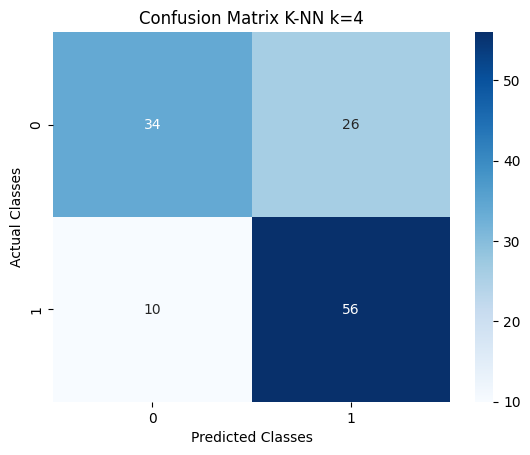

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix #library untuk menampilkan confussion matrix
import seaborn as sns #visualisasi matrix

conf_matrix= confusion_matrix(y_test, predicted_knn)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix K-NN k=4')
plt.xlabel('Predicted Classes')
plt.ylabel('Actual Classes')

In [ ]:
from sklearn.metrics import classification_report #library untuk menghitung classification report (precision, recall, accuracy)

classification_report = classification_report(y_test, predicted_knn) #yang akan dilihat adalah class report dari data uji
print('\n Accuracy: ', accuracy_score(y_test, predicted_knn), )
print('\nClassification Report')
print('======================================================')
print('\n', classification_report, )


 Accuracy:  0.7142857142857143

Classification Report

               precision    recall  f1-score   support

     Negatif       0.77      0.57      0.65        60
     Positif       0.68      0.85      0.76        66

    accuracy                           0.71       126
   macro avg       0.73      0.71      0.71       126
weighted avg       0.73      0.71      0.71       126



# **CLASSIFICATION REPORT KNN**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from sklearn.model_selection import cross_val_score, StratifiedKFold
import matplotlib.pyplot as plt
classification_report = classification_report(y_test, predicted_knn)

In [ ]:
print('\n Accuracy: ', accuracy_score(y_test, predicted_knn))
print('\nClassification Report')
print('======================================================')
print('\n', classification_report)


 Accuracy:  0.7380952380952381

Classification Report

               precision    recall  f1-score   support

     Negatif       0.73      0.72      0.72        60
     Positif       0.75      0.76      0.75        66

    accuracy                           0.74       126
   macro avg       0.74      0.74      0.74       126
weighted avg       0.74      0.74      0.74       126



# **CONFUSION MATRIX KNN**

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

Text(50.722222222222214, 0.5, 'Actual Classes')

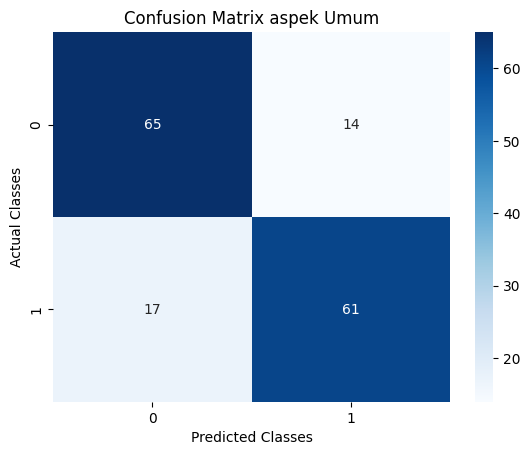

In [ ]:
conf_matrix= confusion_matrix(y_test, predicted_knn)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix K-NN k=4')
plt.xlabel('Predicted Classes')
plt.ylabel('Actual Classes')

Text(50.722222222222214, 0.5, 'Actual Classes')

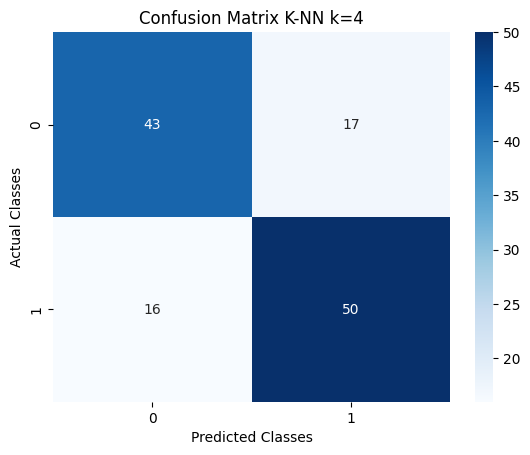

In [ ]:
conf_matrix= confusion_matrix(y_test, predicted_knn)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix K-NN k=4')
plt.xlabel('Predicted Classes')
plt.ylabel('Actual Classes')

# **K-FOLD CROSS VALIDATION**

In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

kfold= StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores_accuracy = cross_val_score(knn, X, Y, cv=kfold,  scoring='accuracy')
scores_precision = cross_val_score(knn, X, Y, cv=kfold,  scoring='precision_macro')
scores_recall = cross_val_score(knn, X, Y, cv=kfold,  scoring='recall_macro')

for i in range(5):
  print(f"iterasi ke-{i+1}:")
  print(f"Hasil: {scores_accuracy[i]} {scores_precision[i]}{scores_recall[i]}")
  print()

print('K-fold akurasi: %s' % scores_accuracy.mean())
print('K-fold precision: %s' % scores_precision.mean())
print('K-fold recall: %s' % scores_recall.mean())


iterasi ke-1:
Hasil: 0.5396825396825397 0.66446280991735540.525094577553594

iterasi ke-2:
Hasil: 0.5555555555555556 0.77049180327868850.5333333333333333

iterasi ke-3:
Hasil: 0.544 0.76639344262295080.525

iterasi ke-4:
Hasil: 0.528 0.76209677419354840.5083333333333333

iterasi ke-5:
Hasil: 0.552 0.7685950413223140.5333333333333333

K-fold akurasi: 0.5438476190476191
K-fold precision: 0.7464079742669715
K-fold recall: 0.5250189155107188


In [ ]:
 print(df_performansi)

**K=3**

In [ ]:
from sklearn.model_selection import cross_val_score
# Lakukan cross-validation dengan n fold
scores_accuracy = cross_val_score(knn, X, Y, cv=10,  scoring='accuracy')
scores_precision = cross_val_score(knn, X, Y, cv=10,  scoring='precision_macro')
scores_recall = cross_val_score(knn, X, Y, cv=10,  scoring='recall_macro')

# Tampilkan skor hasil cross-validation
print("Hasil Cross-Validation accuracy: ", scores_accuracy)
print("Skor Akurasi: ", scores_accuracy.mean())
print("Hasil Cross-Validation precision: ", scores_precision)
print("Skor Precison : ", scores_precision.mean())
print("Hasil Cross-Validation recall: ", scores_recall)
print("Skor Recall: ", scores_recall.mean())

Hasil Cross-Validation accuracy:  [0.55555556 0.57142857 0.52380952 0.53968254 0.52380952 0.53968254
 0.53968254 0.64516129 0.56451613 0.51612903]
Skor Akurasi:  0.5519457245263697
Hasil Cross-Validation precision:  [0.76666667 0.775      0.26190476 0.76612903 0.51229508 0.76612903
 0.76612903 0.69494048 0.77118644 0.25806452]
Skor Precison :  0.633844504031031
Hasil Cross-Validation recall:  [0.5483871  0.55       0.5        0.51666667 0.50151515 0.51666667
 0.51666667 0.63645833 0.55       0.5       ]
Skor Recall:  0.5336360581622679


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **TF-IDF MANUAL, COBA2**

In [ ]:
list_gabungan_prepro = []
for element in Ulasan_stem:
  list_gabungan_prepro.extend(element)

print(list_gabungan_prepro)

['tempat', 'nyaman', 'parkir', 'luas', 'kadang', 'kamar', 'mandi', 'kotor', 'bagus', 'bersih', 'kamar', 'mandi', 'kotor', 'tugas', 'periksa', 'jam', 'jam', 'jaga', 'bersih', 'air', 'kolam', 'anak', 'panas', 'kayak', 'beri', 'hias', 'dingin', 'lindung', 'panas', 'untuk', 'anak', 'kamar', 'mandi', 'bersih', 'suka', 'renang', 'sabtu', 'ini', 'doa', 'hujan', 'tidak', 'kesini', 'sesal', 'masuk', 'banyak', 'atur', 'antar', 'pakai', 'sepatu', 'istri', 'damping', 'anak', 'renang', 'pakai', 'kaos', 'kaki', 'rekomendasi', 'fitnes', 'atur', 'renang', 'lokernya', 'pakai', 'kartu', 'ajar', 'tidak bisa', 'pakai', 'loger', 'adik saya', 'bom', 'dapat', 'dapat', 'loker', 'uang', 'adik saya', 'hilang', 'aduh', 'kecewa', 'minggu', 'ramai', 'bos', 'mahal', 'senin', 'buka', 'jam', 'kerja', 'libur', 'senin', 'ingin', 'renang', 'ingin', 'kejar', 'kartika', 'eka', 'paksi', 'harga', 'tempat', 'nyaman', 'bersih', 'pegawai', 'ramah', 'air', 'kamar', 'ganti', 'bersih', 'rapi', 'parkir', 'luas', 'nyaman', 'kolam',

In [ ]:
def tf(data):
  data_tf= {}
  for kata in data:
    if kata in data_tf:
      data_tf[kata] +=1
    else:
      data_tf[kata] = 1

  for kata in data_tf:
    data_tf[kata]= data_tf[kata]/len(data)
  return data_tf

Ulasan_tf= tf(list_gabungan_prepro)

In [ ]:
print ('HASIL TF')
print (Ulasan_tf)

HASIL TF
{'tempat': 0.014713343480466767, 'nyaman': 0.01141552511415525, 'parkir': 0.006341958396752917, 'luas': 0.011669203450025367, 'kadang': 0.0027904616945712835, 'kamar': 0.016235413495687467, 'mandi': 0.013444951801116184, 'kotor': 0.009386098427194317, 'bagus': 0.02815829528158295, 'bersih': 0.04134956874682902, 'tugas': 0.0010147133434804667, 'periksa': 0.0005073566717402334, 'jam': 0.0035514967021816335, 'jaga': 0.0043125317097919835, 'air': 0.02359208523592085, 'kolam': 0.0669710806697108, 'anak': 0.03145611364789447, 'panas': 0.010147133434804667, 'kayak': 0.00076103500761035, 'beri': 0.0017757483510908167, 'hias': 0.0002536783358701167, 'dingin': 0.0017757483510908167, 'lindung': 0.0005073566717402334, 'untuk': 0.00076103500761035, 'suka': 0.0027904616945712835, 'renang': 0.0684931506849315, 'sabtu': 0.0017757483510908167, 'ini': 0.0002536783358701167, 'doa': 0.0002536783358701167, 'hujan': 0.0005073566717402334, 'tidak': 0.0027904616945712835, 'kesini': 0.0015220700152207

In [ ]:
def df(datadf):
  data_df= {}
  for data in datadf:
      for kata in data:
          if kata in data_df:
              data_df[kata] +=1
          else:
              data_df [kata]= 1
  return data_df

Ulasan_df= df(Ulasan_stem)

In [ ]:
print ('HASIL DF')
print (Ulasan_df)

HASIL DF
{'tempat': 58, 'nyaman': 45, 'parkir': 25, 'luas': 46, 'kadang': 11, 'kamar': 64, 'mandi': 53, 'kotor': 37, 'bagus': 111, 'bersih': 163, 'tugas': 4, 'periksa': 2, 'jam': 14, 'jaga': 17, 'air': 93, 'kolam': 264, 'anak': 124, 'panas': 40, 'kayak': 3, 'beri': 7, 'hias': 1, 'dingin': 7, 'lindung': 2, 'untuk': 3, 'suka': 11, 'renang': 270, 'sabtu': 7, 'ini': 1, 'doa': 1, 'hujan': 2, 'tidak': 11, 'kesini': 6, 'sesal': 2, 'masuk': 40, 'banyak': 6, 'atur': 2, 'antar': 3, 'pakai': 11, 'sepatu': 1, 'istri': 2, 'damping': 2, 'kaos': 1, 'kaki': 3, 'rekomendasi': 10, 'fitnes': 2, 'lokernya': 2, 'kartu': 1, 'ajar': 25, 'tidak bisa': 1, 'loger': 1, 'adik saya': 2, 'bom': 1, 'dapat': 5, 'loker': 4, 'uang': 1, 'hilang': 5, 'aduh': 2, 'kecewa': 20, 'minggu': 18, 'ramai': 26, 'bos': 3, 'mahal': 9, 'senin': 5, 'buka': 18, 'kerja': 3, 'libur': 28, 'ingin': 6, 'kejar': 1, 'kartika': 1, 'eka': 1, 'paksi': 1, 'harga': 67, 'pegawai': 1, 'ramah': 8, 'ganti': 34, 'rapi': 4, 'hari': 4, 'hijau': 8, 'dewas

In [ ]:
n_data = len(Ulasan_df)

def idf(__n_data, __Ulasan_df):
  data_idf={}
  for kata in __Ulasan_df:
    data_idf[kata]= np.log(__n_data / (__Ulasan_df[kata] + 1))
  return data_idf

Ulasan_idf= idf(n_data, Ulasan_df)

In [ ]:
print ('HASIL IDF')
print (Ulasan_idf)

HASIL IDF
{'tempat': 2.516876015844059, 'nyaman': 2.7657720632606835, 'parkir': 3.3363169217282964, 'luas': 2.7442658580397197, 'kadang': 4.109506809961778, 'kamar': 2.4200261898541413, 'mandi': 2.605429413185504, 'kotor': 2.956827300023393, 'bagus': 1.875914588454684, 'bersih': 1.49454703192558, 'tugas': 4.9849755473156785, 'periksa': 5.495801171081669, 'jam': 3.8863632586475685, 'jaga': 3.704041701853614, 'air': 2.0511186774797747, 'kolam': 1.0146836337635563, 'anak': 1.7660997224474773, 'panas': 2.8808413930454706, 'kayak': 5.208119098629888, 'beri': 4.514971918069943, 'hias': 5.901266279189834, 'dingin': 4.514971918069943, 'lindung': 5.495801171081669, 'untuk': 5.208119098629888, 'suka': 4.109506809961778, 'renang': 0.9922946388700776, 'sabtu': 4.514971918069943, 'ini': 5.901266279189834, 'doa': 5.901266279189834, 'hujan': 5.495801171081669, 'tidak': 4.109506809961778, 'kesini': 4.6485033106944655, 'sesal': 5.495801171081669, 'masuk': 2.8808413930454706, 'banyak': 4.648503310694465

In [ ]:
def tf_idf(Ulasan_tf):
  tf_idf = {}
  for kata in Ulasan_tf:
    tf_idf[kata] = Ulasan_tf[kata] * Ulasan_idf[kata]
  return tf_idf

Ulasan_tfidf= tf_idf(Ulasan_tf)

In [ ]:
print ('HASIL TF-IDF')
print (Ulasan_tfidf)

HASIL TF-IDF
{'tempat': 0.037031661318862354, 'nyaman': 0.03157274044818131, 'parkir': 0.021158783115983616, 'luas': 0.03202339661842392, 'kadang': 0.011467421336778173, 'kamar': 0.039290125862675045, 'mandi': 0.035029872881489524, 'kotor': 0.027753072070234787, 'bagus': 0.052822556904736154, 'bersih': 0.06179887524197603, 'tugas': 0.0050583212047850615, 'periksa': 0.0027883313907060723, 'jam': 0.013802406296566707, 'jaga': 0.015973797293635576, 'air': 0.048390166668092094, 'kolam': 0.06795445949101442, 'anak': 0.05555463358282272, 'panas': 0.029232282019740947, 'kayak': 0.003963560957861406, 'beri': 0.008017453938734043, 'hias': 0.0014970234092313124, 'dingin': 0.008017453938734043, 'lindung': 0.0027883313907060723, 'untuk': 0.003963560957861406, 'suka': 0.011467421336778173, 'renang': 0.06796538622397792, 'sabtu': 0.008017453938734043, 'ini': 0.0014970234092313124, 'doa': 0.0014970234092313124, 'hujan': 0.0027883313907060723, 'tidak': 0.011467421336778173, 'kesini': 0.007075347504862

In [ ]:
sorted_DF = sorted(Ulasan_df.items(), key=lambda kv: kv[1], reverse=True)
unique_term = [item[0] for item in sorted_DF]

def TF_IDF_Vec(__tf_idf):
    TF_IDF_vector = [0.0] * len(unique_term)

    # For each unique word, if it is in the review, store its TF-IDF value.
    for i, kata in enumerate(unique_term):
        if kata in __tf_idf:
            TF_IDF_vector[i] = __tf_idf[kata]
    return TF_IDF_vector

TFIDF_Vector= TF_IDF_Vec(Ulasan_tfidf)

In [ ]:
print("Tf IDF Vector")
print(TFIDF_Vector)


Tf IDF Vector
[0.06796538622397792, 0.06795445949101442, 0.06179887524197603, 0.05555463358282272, 0.052822556904736154, 0.048390166668092094, 0.04672391378453241, 0.04036496335779705, 0.039290125862675045, 0.03741858573164206, 0.037031661318862354, 0.03624461764263135, 0.035029872881489524, 0.03202339661842392, 0.03157274044818131, 0.029232282019740947, 0.029232282019740947, 0.028252757208920603, 0.027753072070234787, 0.026212131796258854, 0.023491442482126094, 0.02292219523931317, 0.021756212947078052, 0.021756212947078052, 0.021158783115983616, 0.021158783115983616, 0.021158783115983616, 0.021158783115983616, 0.019933097786971627, 0.019933097786971627, 0.019933097786971627, 0.019933097786971627, 0.018663315863577043, 0.018663315863577043, 0.018010608939758272, 0.018010608939758272, 0.018010608939758272, 0.016666550139649943, 0.016666550139649943, 0.015973797293635576, 0.015973797293635576, 0.01526615977957813, 0.014542712090981725, 0.014542712090981725, 0.014542712090981725, 0.01454

# **MASUK KNN JANGAN BIKIN NANGES**

In [ ]:
pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post5-py3-none-any.whl size=2950 sha256=1e0f325c0ca2aacfca10f9666cf1390c61866ab97acf49282351b56fde63a633
  Stored in directory: /root/.cache/pip/wheels/38/1f/8d/4f812c590e074c1e928f5cec67bf5053b71f38e2648739403a
Successfully built sklearn


In [ ]:
plt.xscale('log')
bins= 1.5**(np.arrange(0,15))


NameError: ignored

In [ ]:
from sklearn.model_selection import train_test_split

X = TFIDF_Vector
Y = df_show['Label'].values
target_names_ulasan= ['Positif', 'Negatif']
print(vectorizer.vocabulary_)

X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size= 0.30, random_state=42)

print('Training', X_train.shape)
print('Testing', X_test.shape)

{'tempat': 650, 'nyaman': 426, 'parkir': 452, 'luas': 356, 'kadang': 231, 'kamar': 239, 'mandi': 369, 'kotor': 302, 'bagus': 44, 'bersih': 79, 'tugas': 688, 'periksa': 470, 'jam': 210, 'jaga': 207, 'air': 5, 'kolam': 290, 'anak': 20, 'panas': 445, 'kayak': 254, 'beri': 77, 'hias': 178, 'dingin': 130, 'lindung': 346, 'untuk': 700, 'suka': 616, 'renang': 520, 'sabtu': 534, 'ini': 194, 'doa': 132, 'hujan': 187, 'tidak': 672, 'kesini': 281, 'sesal': 584, 'masuk': 377, 'banyak': 57, 'atur': 37, 'antar': 23, 'pakai': 441, 'sepatu': 578, 'istri': 201, 'damping': 116, 'kaos': 245, 'kaki': 235, 'rekomendasi': 514, 'fitnes': 149, 'lokernya': 352, 'kartu': 251, 'ajar': 7, 'bisa': 90, 'loger': 349, 'adik': 1, 'saya': 553, 'bom': 93, 'dapat': 118, 'loker': 351, 'uang': 694, 'hilang': 182, 'aduh': 2, 'kecewa': 257, 'minggu': 397, 'ramai': 507, 'bos': 95, 'mahal': 363, 'senin': 576, 'buka': 102, 'kerja': 275, 'libur': 343, 'ingin': 193, 'kejar': 258, 'kartika': 250, 'eka': 139, 'paksi': 443, 'harga':

ValueError: ignored

In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

In [ ]:
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(list_gabungan_prepro)

# transform a count matrix to a normalized tf-idf representation (tf-idf transformer)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

In [ ]:
classes = X
feature_names = vectorizer.get_feature_names()

clf = neighbors.KNeighborsRegressor(n_neighbors=1)
clf.fit(response, classes)
clf.predict(response)

NameError: ignored

In [ ]:
knn = KNeighborsClassifier(n_neighbors=7)

# training our classifier ; train_data.target will be having numbers assigned for each category in train data
clf = knn.fit(X_train_tfidf, list_gabungan_prepro.target)

# Input Data to predict their classes of the given categories
docs_new = ['I have a Harley Davidson and Yamaha.', 'I have a GTX 1050 GPU']
# building up feature vector of our input
X_new_counts = count_vect.transform(docs_new)
# We call transform instead of fit_transform because it's already been fit
X_new_tfidf = tfidf_transformer.transform(X_new_counts)


In [ ]:
train_data= fetch_20newsgroups(subset='train', categories=X, shuffle=True, random_state=42)

TypeError: ignored

In [ ]:
feature_names_ulasan = Ulasan_tfidf #x variable names
X_ulasan = feature_names_ulasan #setting the col names
y_ulasan = df_show['Label'].values #setting the col names
#target_names_fruits = ['apple', 'mandarin', 'orange', 'lemon'] #potential classes

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_ulasan, y_ulasan, random_state=0)

ValueError: ignored

In [ ]:
print(y_ulasan)

In [ ]:
#@title
dt_download = pd.DataFrame(df_show_aspek_methods)
dt_download.to_excel("aspek_metode.xlsx")

# **INI GA TAU NGAPAIN**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(smooth_idf=False, norm=None)

for train_index, test_index in kfold.split(data_final, Y):
  X_train, X_test = X[train_index], X[test_index]
  Y_train, Y_test = Y[train_index], Y[test_index]

  X_train_weigh = vectorizer.fit_transform(x_train).toarray()
  X_test_wight = vectorizer.fit_transform(x_test).toarray()

  KNeighborsClassifier.fit(X_train_wight, Y_train)
  y_pred = KNeighborsClassifier.predict(X_test_wight)

  report = classification_report(Y_test, y_pred)

  print()
  print(f"iterasi ke-{j}========================================")
  print(report)

AttributeError: ignored

In [ ]:
type(Ulasan_stem)

list

In [ ]:
prepro = list(df_prepro['preprocessing'].apply(str))

NameError: ignored

In [ ]:
df_prepros = pd.read_csv("hasil.csv", usecols=["Unnamed: 0", "0"])
df_prepros.columns = ["label", "ulasan"]
df_prepros.head(5)

In [ ]:
print(df_prepros)